In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from math import sqrt
import matplotlib.pyplot as plt


In [2]:
## Import Dataset

import pandas as pd
df = pd.read_csv('binding_data_14.csv')
df

,Z,N,A,magicZ,magicN,Z_valence,N_valence,pair,radius,surface_area,|N-Z|,EB
0,8,8,16,0,0,0,0,8,2.519842,6.349604,0,127.619315
1,8,9,17,0,0,0,1,6,2.571282,6.611489,1,131.762395
2,9,8,17,0,0,1,0,3,2.571282,6.611489,1,128.219583
3,8,10,18,0,0,0,2,9,2.620741,6.868285,2,139.807766
4,9,9,18,0,0,1,1,1,2.620741,6.868285,0,137.369489
...,...,...,...,...,...,...,...,...,...,...,...,...
2331,108,157,265,4,5,26,31,6,6.423158,41.256962,49,1933.505561
2332,108,158,266,4,5,26,32,9,6.431228,41.360688,50,1941.337453
2333,109,157,266,4,5,27,31,2,6.431228,41.360688,48,1934.022107
2334,110,159,269,4,5,28,33,6,6.455315,41.671089,49,1950.291722


In [3]:
# Dimension check, column names, and missing values

print(df.shape)
print(df.columns.values)
print(df.isnull().sum().sum())

(2336, 12)
['Z' 'N' 'A' 'magicZ' 'magicN' 'Z_valence' 'N_valence' 'pair' 'radius'
 'surface_area' '|N-Z|' 'EB']
0


In [4]:
# Descriptive statistics
print(df.shape)
df.info()
df.describe()

(2336, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2336 entries, 0 to 2335
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Z             2336 non-null   int64  
 1   N             2336 non-null   int64  
 2   A             2336 non-null   int64  
 3   magicZ        2336 non-null   int64  
 4   magicN        2336 non-null   int64  
 5   Z_valence     2336 non-null   int64  
 6   N_valence     2336 non-null   int64  
 7   pair          2336 non-null   int64  
 8   radius        2336 non-null   float64
 9   surface_area  2336 non-null   float64
 10  |N-Z|         2336 non-null   int64  
 11  EB            2336 non-null   float64
dtypes: float64(3), int64(9)
memory usage: 219.1 KB


,Z,N,A,magicZ,magicN,Z_valence,N_valence,pair,radius,surface_area,|N-Z|,EB
count,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000
mean,58.726455,82.052226,140.778682,2.669521,3.312500,11.526113,15.133562,5.279966,5.067386,26.407769,23.443921,1130.854511
std,23.989257,37.463482,61.055542,1.068704,1.248875,8.506665,10.766001,2.610053,0.854211,8.195753,14.989542,450.127867
min,8.000000,8.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.519842,6.349604,0.000000,127.619315
25%,40.000000,53.000000,93.000000,2.000000,3.000000,4.000000,6.000000,4.000000,4.530655,20.526834,11.000000,799.374766
50%,59.000000,83.000000,143.000000,3.000000,4.000000,10.000000,14.000000,6.000000,5.229322,27.345804,22.000000,1178.011346
75%,79.000000,110.000000,189.000000,3.000000,4.000000,18.000000,23.000000,9.000000,5.738794,32.933751,34.000000,1491.155894
max,110.000000,160.000000,270.000000,4.000000,5.000000,31.000000,43.000000,9.000000,6.463304,41.774299,59.000000,1958.516118


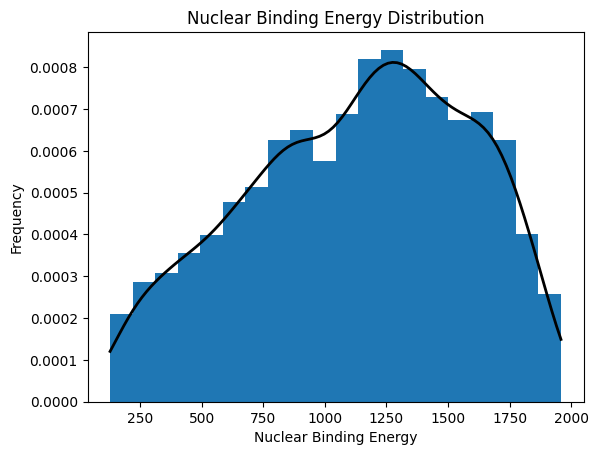

In [5]:
# Plot of Nuclear Binding Energy Distribution

from scipy.stats import gaussian_kde

# Create a distribution plot for feature A
plt.hist(df['EB'], bins=20, density=True)

# Generate data for the distribution line
xd = np.linspace(df['EB'].min(), df['EB'].max(), 100)
density = gaussian_kde(df['EB'])
yd = density(xd)

# Add the distribution line
plt.plot(xd, yd, 'k', linewidth=2)
plt.xlabel('Nuclear Binding Energy')
plt.ylabel('Frequency')
plt.title('Nuclear Binding Energy Distribution')

# Show the plot
plt.show()


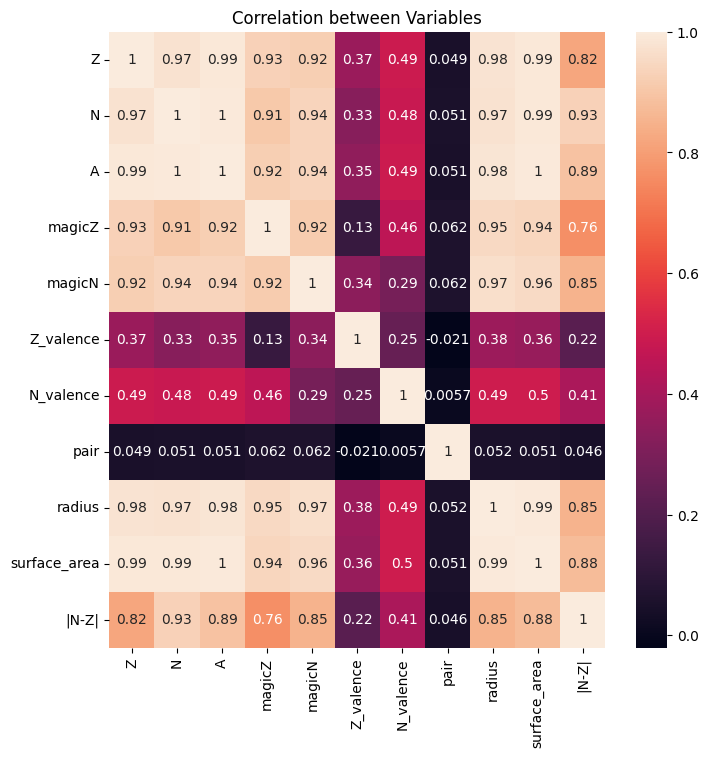

In [6]:
## Correlation between features:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(df.drop(["EB"], axis=1).corr(), annot=True)
plt.title('Correlation between Variables')
plt.show()


In [7]:
# Separate attributes(X) and labels(y):
X = df.drop(["EB"], axis=1)
Y = df["EB"]
X = X.values
Y = Y.values

In [8]:
# Divide data into train data and test data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [9]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from pygam import LinearGAM, s, f
import time
import numpy as np
from math import sqrt

start_time = time.time()

# Create a GAM model
gam = LinearGAM(s(0, n_splines=30, spline_order=3) + 
                s(1, n_splines=30, spline_order=3) + 
                s(2, n_splines=30, spline_order=4) + 
                f(3) + 
                f(4) + 
                s(5, n_splines=30, spline_order=4) + 
                s(6, n_splines=30, spline_order=4) +
                f(7) +
                s(8, n_splines=30, spline_order=4) +
                s(9, n_splines=30, spline_order=4) + 
                s(10, n_splines=30, spline_order=3)   
)

# Create KFold object
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Store MSE values for each lambda combination
rmse_scores = []

# Perform cross-validation with KFold and grid search
for train_index, test_index in kfold.split(X_train):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    Y_train_fold, Y_test_fold = Y_train[train_index], Y_train[test_index]
    gam.gridsearch(X_train_fold, Y_train_fold)
    Y_pred = gam.predict(X_test_fold)
    rmse = sqrt(mean_squared_error(Y_test_fold, Y_pred))
    rmse_scores.append(rmse)

# Calculate average MSE from cross-validation
mean_rmse = np.mean(rmse_scores)

# Output cross-validation MSE score
print("Cross-validation MSE: {:.3f}".format(mean_rmse))

# Train model with the best lambda value and all training data
lam = np.logspace(-5, 4, 1)
lams = [lam] * 11
gam.gridsearch(X_train, Y_train, lam=lams)
print("GAM processing time: %s seconds" % (time.time()-start_time))


  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--


  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:09
 18% (2 of 11) |####                     | Elapsed Time: 0:00:01 ETA:   0:00:07
 27% (3 of 11) |######                   | Elapsed Time: 0:00:02 ETA:   0:00:07
 36% (4 of 11) |#########                | Elapsed Time: 0:00:03 ETA:   0:00:05
 45% (5 of 11) |###########              | Elapsed Time: 0:00:04 ETA:   0:00:04
 54% (6 of 11) |#############            | Elapsed Time: 0:00:04 ETA:   0:00:03
 63% (7 of 11) |###############          | Elapsed Time: 0:00:05 ETA:   0:00:02
 72% (8 of 11) |##################       | Elapsed Time: 0:00:06 ETA:   0:00:02
 81% (9 of 11) |####################     | Elapsed Time: 0:00:07 ETA:   0:00:01
 90% (10 of 11) |#####################   | Elapsed Time: 0:00:08 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:08 Time:  0:00:08
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  9% (1 of 11) |##                      

Cross-validation MSE: 0.306


100% (1 of 1) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00


GAM processing time: 40.91667318344116 seconds


In [10]:
# RMSE for each fold of the cross-validation
print(rmse_scores)


[0.35001840881631113, 0.27481814559851486, 0.35963829352772, 0.2877002169035003, 0.2556426998616005]


In [11]:
# Extract the best lambda value for each feature
best_lams = gam.lam

# Output the best lambda value for each feature
for i, best_lam in enumerate(best_lams):
    print("Best lambda for feature {}: {}".format(i, best_lam))


Best lambda for feature 0: [1e-05]
Best lambda for feature 1: [1e-05]
Best lambda for feature 2: [1e-05]
Best lambda for feature 3: [1e-05]
Best lambda for feature 4: [1e-05]
Best lambda for feature 5: [1e-05]
Best lambda for feature 6: [1e-05]
Best lambda for feature 7: [1e-05]
Best lambda for feature 8: [1e-05]
Best lambda for feature 9: [1e-05]
Best lambda for feature 10: [1e-05]


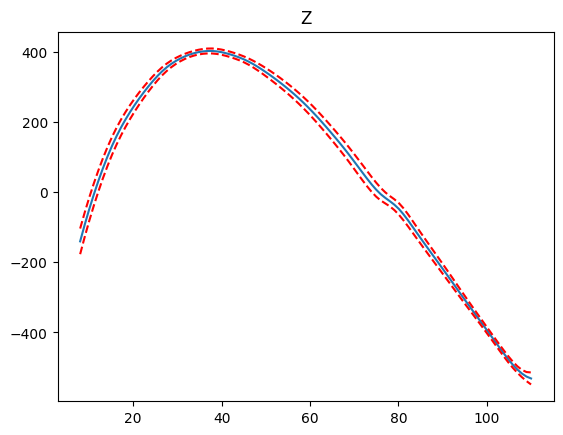

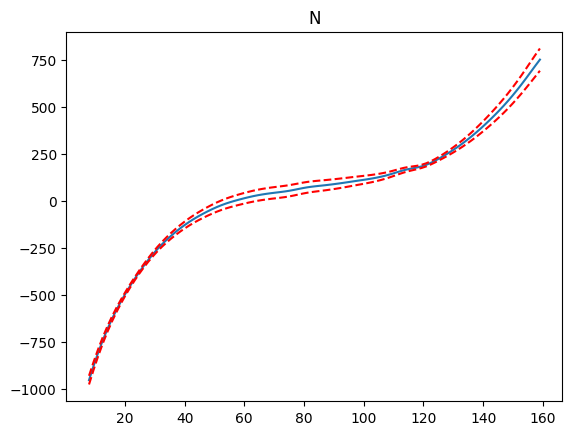

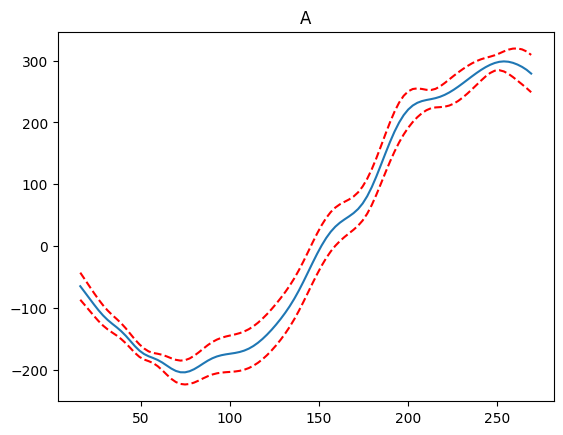

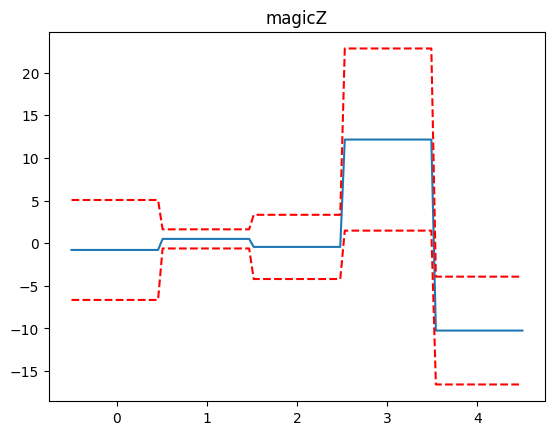

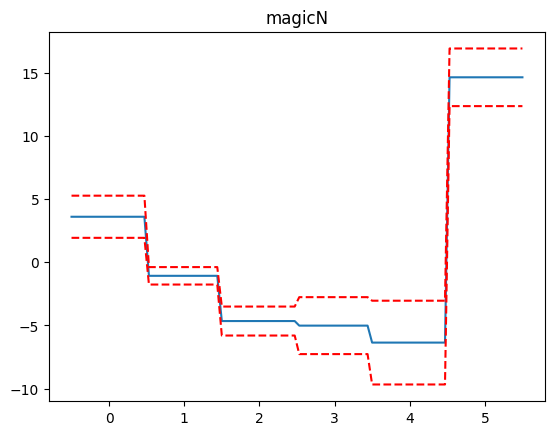

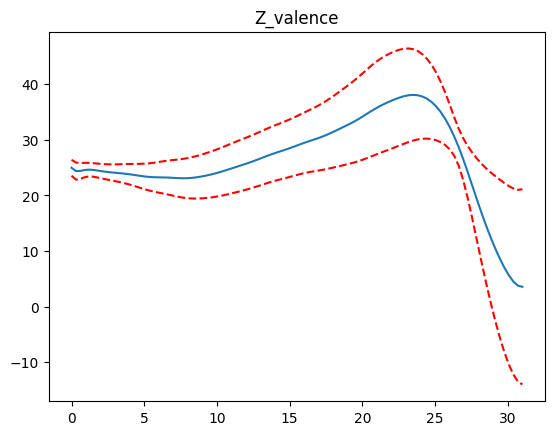

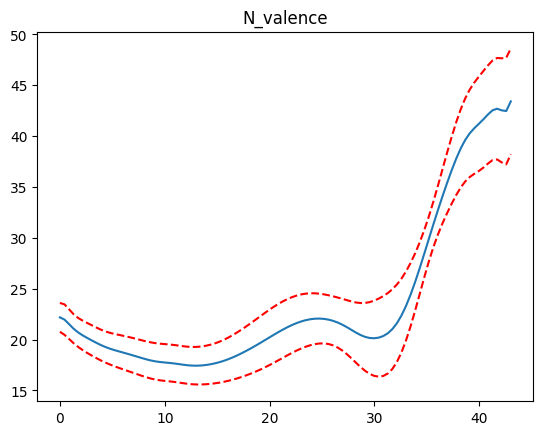

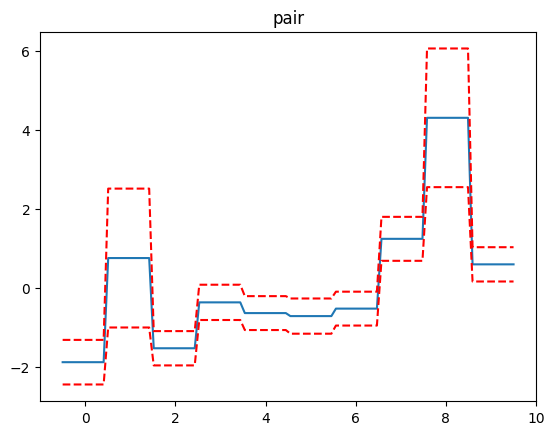

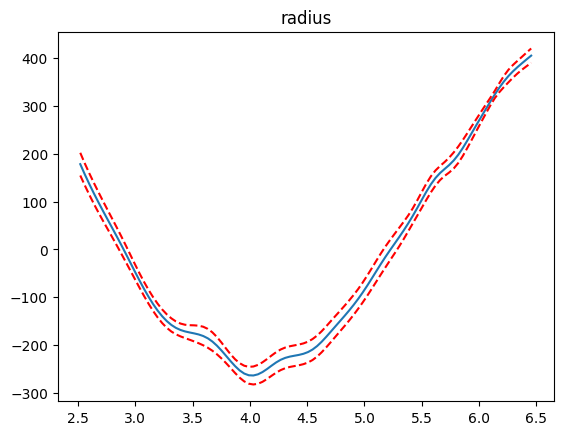

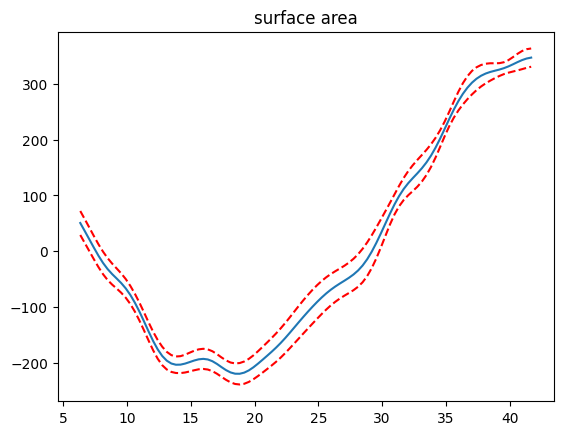

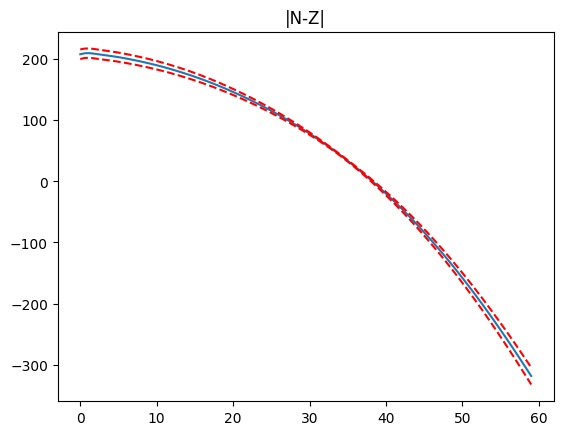

In [12]:
## Plotting the effect of each feature using the GAM method
features = ['Z', 'N', 'A', 'magicZ', 'magicN', 'Z_valence', 'N_valence', 'pair', 'radius',
 'surface area', '|N-Z|']
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)
    plt.figure()
    plt.plot(XX[:, term.feature], pdep)
    plt.plot(XX[:, term.feature], confi, c='r', ls='--')
    plt.title(features[i])
    plt.show()


In [13]:
## EB(A,Z) function from various methods

## Real Nuclear Data
df_real = pd.read_csv('binding_data_14.csv', index_col=None)
df_real = df_real.dropna()
df_real = df_real.astype({'A':int, 'Z':int})
def real(A,Z):
    temp = df_real[df_real['Z'] == Z]
    temp = temp[temp['A'] == A]
    return float(temp['EB'])

## LDM Nuclear Data
df_LDM = pd.read_csv('LDM.csv', index_col=None)
df_LDM = df_LDM.dropna()
df_LDM = df_LDM.astype({'A':int, 'Z':int})
def LDM(A,Z):
    temp = df_LDM[df_LDM['Z'] == Z]
    temp = temp[temp['A'] == A]
    return float(temp['EB_LDM'])

## GAM Prediction
df_gam = pd.read_csv('binding_data_14.csv', index_col=None)
df_gam = df_gam.astype({'A':int, 'Z':int})
def gam_pred(A,Z):
    temp = df_gam[df_gam['Z'] == Z]
    temp = temp[temp['A'] == A]
    dat = { 
        'Z':[int(temp['Z'])],
        'N':[int(temp['N'])],
        'A':[int(temp['A'])],
        'magicZ':[int(temp['magicZ'])],
        'magicN':[int(temp['magicN'])],
        'Z_valence':[int(temp['Z_valence'])],
        'N_valence':[int(temp['N_valence'])],
        'pair':[int(temp['pair'])],
        'radius':[float(temp['radius'])],
        'surface_area':[float(temp['surface_area'])],
        '|N-Z|':[int(temp['|N-Z|'])],
    }
    features = pd.DataFrame(dat)
    EB_pred = gam.predict(features)
    return float(EB_pred)


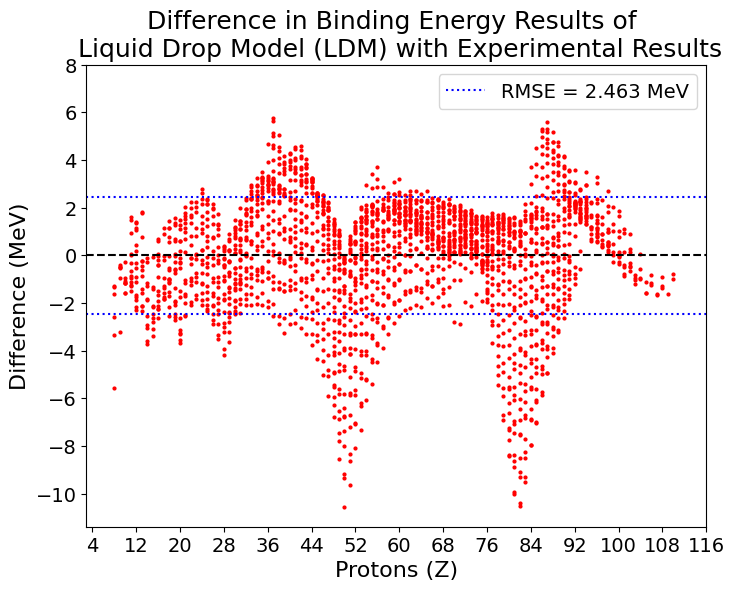

In [14]:
import matplotlib.pyplot as plt

# Data for the plot
df_Z = []
df_N = []
ldm_diff = []
B_LDM = []
for i in range(X.shape[0]):
    A = X[i][2]
    N = X[i][1]
    Z = X[i][0]
    df_Z.append(Z)
    df_N.append(N)
    # LDM
    ldm_diff.append(LDM(A, Z) - Y[i])
    B_LDM.append(LDM(A, Z))

# Figure size
plt.figure(figsize=(8, 6))

# Horizontal reference lines
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=2.4523, color='b', linestyle=':', label="RMSE = 2.463 MeV")
plt.axhline(y=-2.4523, color='b', linestyle=':')

# Scatter plot data
plt.scatter(df_Z, ldm_diff, c="red",
            # linewidths = 0.6,
            marker="o",
            # edgecolor="blue",
            s=4)

# Font size for axis labels and tick numbers
plt.xticks(range(4, 120, 8), fontsize=14)  # Enlarge numbers on X-axis
plt.yticks(range(-10, 10, 2), fontsize=14)  # Enlarge numbers on Y-axis
plt.xlabel("Protons (Z)", fontsize=16)  # Enlarge X-axis label
plt.ylabel("Difference (MeV)", fontsize=16)  # Enlarge Y-axis label

# Legend with enlarged font size
plt.legend(loc='upper right', fontsize=14)

# Plot title with enlarged font size
plt.title("Difference in Binding Energy Results of \n Liquid Drop Model (LDM) with Experimental Results", fontsize=18)

# Display plot
plt.show()


In [15]:
## RMSE Calculation for the LDM Method
rmse_ldm = sqrt(mean_squared_error(Y, B_LDM))
print("LDM RMSE Value:", rmse_ldm)


LDM RMSE Value: 2.4523880121497044


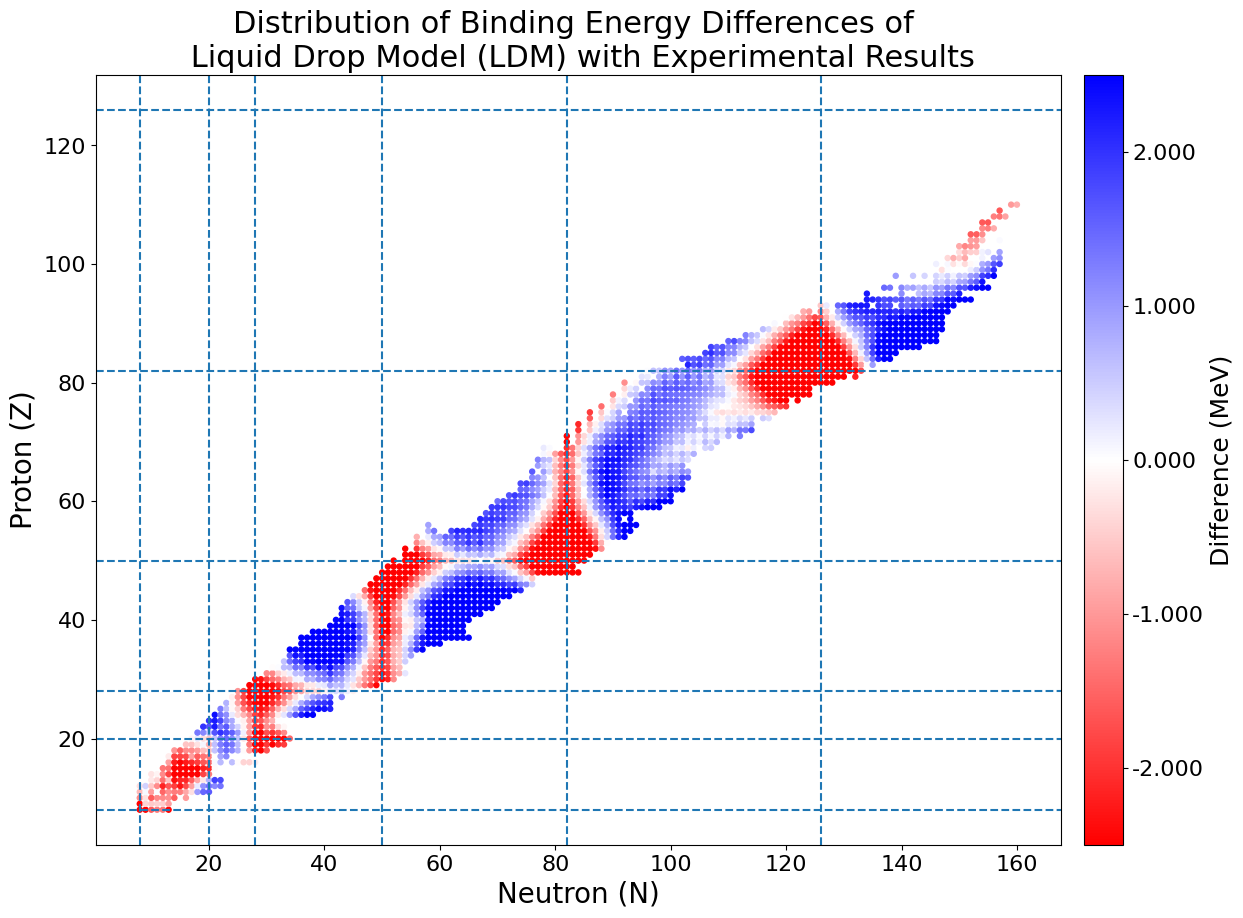

In [16]:
import matplotlib.pyplot as plt

# Figure size
plt.figure(figsize=(15, 10))

# Vertical and horizontal lines for N and Z positions
plt.axvline(x=8, linestyle='--')
plt.axhline(y=8, linestyle='--')
plt.axvline(x=20, linestyle='--')
plt.axhline(y=20, linestyle='--')
plt.axvline(x=28, linestyle='--')
plt.axhline(y=28, linestyle='--')
plt.axvline(x=50, linestyle='--')
plt.axhline(y=50, linestyle='--')
plt.axvline(x=82, linestyle='--')
plt.axhline(y=82, linestyle='--')
plt.axvline(x=126, linestyle='--')
plt.axhline(y=126, linestyle='--')

# Scatter plot data with LDM
plt.scatter(df_N, df_Z, s=13, c=ldm_diff, cmap="bwr_r")

# Colorbar to show energy differences
cbar = plt.colorbar(orientation="vertical", pad=0.02, shrink=1, aspect=20, format="%.3f")
cbar.set_label(label="Difference (MeV)", size=18)  # Change colorbar label size

# Increase font size for colorbar ticks
cbar.ax.yaxis.set_tick_params(labelsize=16)

# Color limits for the colorbar
plt.clim(-2.5, 2.5)

# Axis labels with enlarged font size
plt.xlabel("Neutron (N)", fontsize=20)
plt.ylabel("Proton (Z)", fontsize=20)

# Increase font size for axis tick labels
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Plot title with a larger font size
plt.title("Distribution of Binding Energy Differences of \n Liquid Drop Model (LDM) with Experimental Results", fontsize=22)

# Show the plot
plt.show()


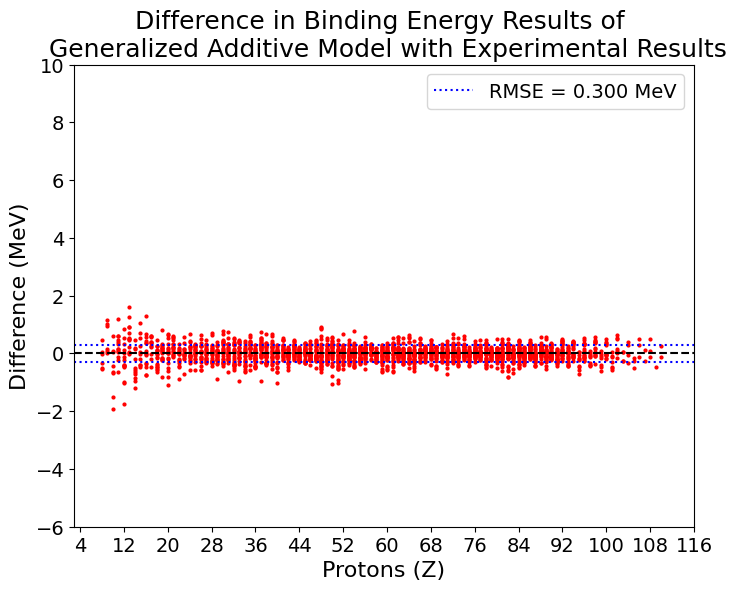

In [17]:
import matplotlib.pyplot as plt

# Data for the plot
df_Z = []
df_N = []
gam_diff = []
B_GAM = []
for i in range(X.shape[0]):
    A = X[i][2]
    N = X[i][1]
    Z = X[i][0]
    df_Z.append(Z)
    df_N.append(N)
    # GAM
    gam_diff.append(gam_pred(A, Z) - Y[i])
    B_GAM.append(gam_pred(A, Z))

# Figure size
plt.figure(figsize=(8, 6))

# Horizontal reference lines
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.300, color='b', linestyle=':', label="RMSE = 0.300 MeV")
plt.axhline(y=-0.300, color='b', linestyle=':')

# Scatter plot data
plt.scatter(df_Z, gam_diff, c="red", marker="o", s=4)  # Marker size remains 4 as in your version

# Font size for axis labels and tick numbers
plt.xticks(range(4, 120, 8), fontsize=14)  # Enlarge numbers on the X-axis
plt.yticks(range(-6, 12, 2), fontsize=14)  # Enlarge numbers on the Y-axis
plt.xlabel("Protons (Z)", fontsize=16)  # Enlarge X-axis label
plt.ylabel("Difference (MeV)", fontsize=16)  # Enlarge Y-axis label

# Legend with enlarged font size
plt.legend(loc='upper right', fontsize=14)

# Plot title with enlarged font size
plt.title("Difference in Binding Energy Results of \n Generalized Additive Model with Experimental Results", fontsize=18)

# Show the plot
plt.show()


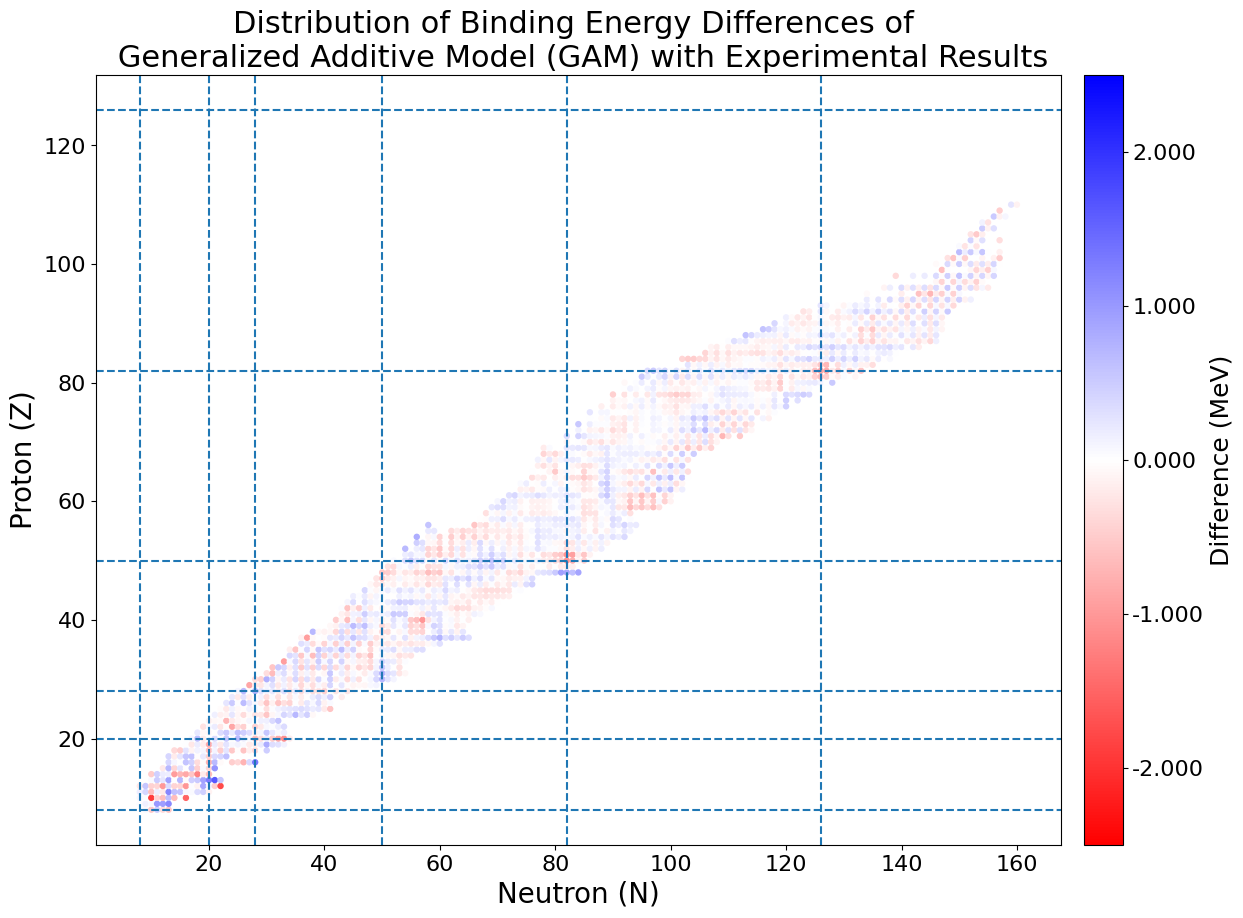

In [18]:
import matplotlib.pyplot as plt

# Figure size
plt.figure(figsize=(15, 10))

# Vertical and horizontal lines for N and Z positions
plt.axvline(x=8, linestyle='--')
plt.axhline(y=8, linestyle='--')
plt.axvline(x=20, linestyle='--')
plt.axhline(y=20, linestyle='--')
plt.axvline(x=28, linestyle='--')
plt.axhline(y=28, linestyle='--')
plt.axvline(x=50, linestyle='--')
plt.axhline(y=50, linestyle='--')
plt.axvline(x=82, linestyle='--')
plt.axhline(y=82, linestyle='--')
plt.axvline(x=126, linestyle='--')
plt.axhline(y=126, linestyle='--')

# Scatter plot data with Generalized Additive Model (GAM)
plt.scatter(df_N, df_Z, s=13, c=gam_diff, cmap="bwr_r")

# Colorbar to show energy differences
cbar = plt.colorbar(orientation="vertical", pad=0.02, shrink=1, aspect=20, format="%.3f")
cbar.set_label(label="Difference (MeV)", size=18)  # Change colorbar label size

# Increase font size for colorbar ticks
cbar.ax.yaxis.set_tick_params(labelsize=16)

# Color limits for the colorbar
plt.clim(-2.5, 2.5)

# Axis labels with enlarged font size
plt.xlabel("Neutron (N)", fontsize=20)
plt.ylabel("Proton (Z)", fontsize=20)

# Increase font size for axis tick labels
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Plot title with a larger font size
plt.title("Distribution of Binding Energy Differences of \n Generalized Additive Model (GAM) with Experimental Results", fontsize=22)

# Show the plot
plt.show()


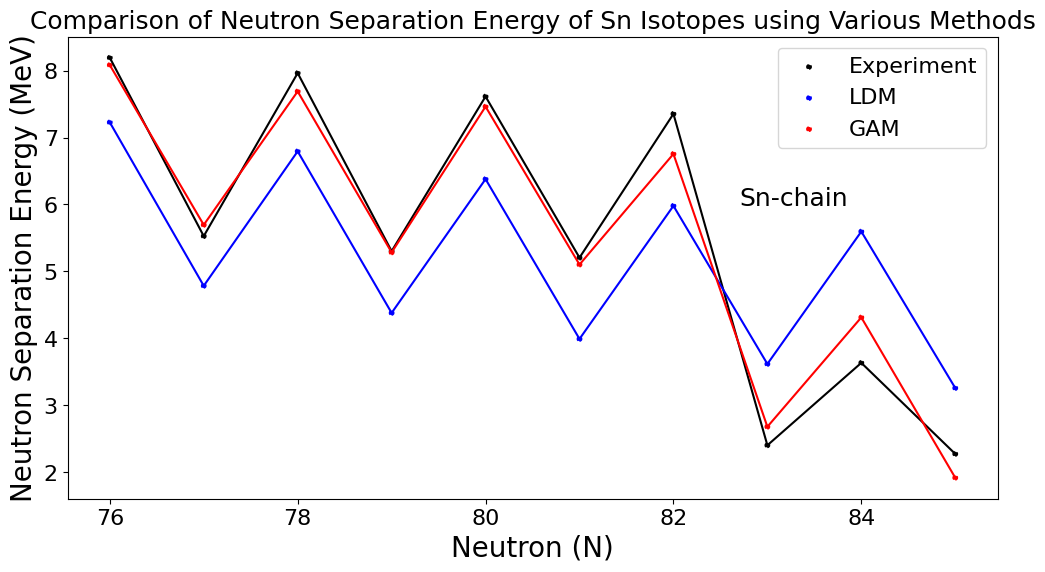

In [19]:
## Plot of Neutron Separation Energy using Various Methods for Sn-Chain

sn_real = []
sn_LDM = []
sn_gam = []
# sn_gami = []
A_N = []

# Used Z,Na,Nb: 20,22,34 \ 35 44 57 \82,114,133 \50 76 85
Z = 50
Na = 76
Nb = 85
for neutron in range(Na, Nb + 1, 1):
    A = Z + neutron
    A_N.append(neutron)
    sn_LDM.append(LDM(A, Z) - LDM(A - 1, Z))
    sn_real.append(real(A, Z) - real(A - 1, Z))
    sn_gam.append(gam_pred(A, Z) - gam_pred(A - 1, Z))
    # sn_gami.append(gami_pred(A, Z) - gami_pred(A - 1, Z))

plt.figure(figsize=(12, 6))

# Real (Experimental)
plt.scatter(A_N, sn_real, c="black",
            # linewidths = 0.6,
            marker="o",
            # edgecolor="blue",
            s=10,
            linestyle="--",
            label='Experiment'
            )
plt.plot(A_N, sn_real, c="black")

# LDM
plt.scatter(A_N, sn_LDM, c="blue",
            # linewidths = 0.6,
            marker="o",
            # edgecolor="blue",
            s=10,
            linestyle="--",
            label='LDM'
            )
plt.plot(A_N, sn_LDM, c="blue")

# GAM
plt.scatter(A_N, sn_gam, c="red",
            # linewidths = 0.6,
            marker="o",
            # edgecolor="blue",
            s=10,
            linestyle="--",
            label='GAM'
            )
plt.plot(A_N, sn_gam, c="red")

plt.xticks(range(Na, Nb, 2))
plt.xlabel("Neutron (N)", fontsize=20)
plt.ylabel("Neutron Separation Energy (MeV)", fontsize=20)

# Increase font size for axis tick labels
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(loc='upper right', fontsize=16)
plt.title("Comparison of Neutron Separation Energy of Sn Isotopes using Various Methods", fontsize=18)
plt.text(A_N[7] - 0.3, sn_LDM[6], "Sn-chain", fontsize=18)
plt.show()


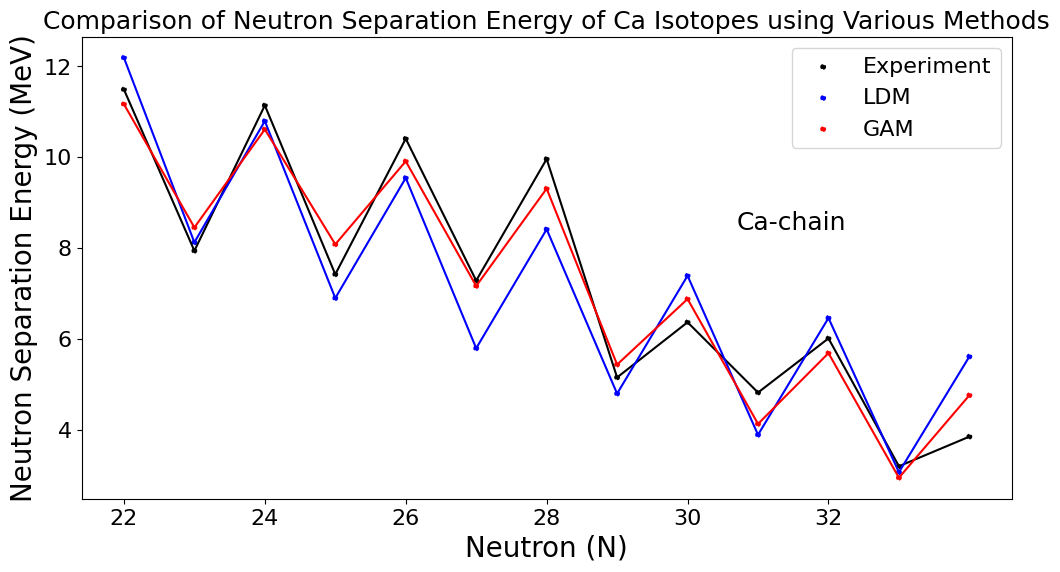

In [20]:
## Plot of Neutron Separation Energy using Various Methods for Ca-Chain

sn_real = []
sn_LDM = []
sn_gam = []
# sn_gami = []
A_N = []

# Used Z,Na,Nb: 20,22,34 \ 35 44 57 \82,114,133 \50 76 85
Z = 20
Na = 22
Nb = 34
for neutron in range(Na, Nb + 1, 1):
    A = Z + neutron
    A_N.append(neutron)
    sn_LDM.append(LDM(A, Z) - LDM(A - 1, Z))
    sn_real.append(real(A, Z) - real(A - 1, Z))
    sn_gam.append(gam_pred(A, Z) - gam_pred(A - 1, Z))
    # sn_gami.append(gami_pred(A, Z) - gami_pred(A - 1, Z))

plt.figure(figsize=(12, 6))

# Real (Experimental)
plt.scatter(A_N, sn_real, c="black",
            # linewidths = 0.6,
            marker="o",
            # edgecolor="blue",
            s=10,
            linestyle="--",
            label='Experiment'
            )
plt.plot(A_N, sn_real, c="black")

# LDM
plt.scatter(A_N, sn_LDM, c="blue",
            # linewidths = 0.6,
            marker="o",
            # edgecolor="blue",
            s=10,
            linestyle="--",
            label='LDM'
            )
plt.plot(A_N, sn_LDM, c="blue")

# GAM
plt.scatter(A_N, sn_gam, c="red",
            # linewidths = 0.6,
            marker="o",
            # edgecolor="blue",
            s=10,
            linestyle="--",
            label='GAM'
            )
plt.plot(A_N, sn_gam, c="red")


plt.xticks(range(Na, Nb, 2))
plt.xlabel("Neutron (N)", fontsize=20)
plt.ylabel("Neutron Separation Energy (MeV)", fontsize=20)

# Increase font size for axis tick labels
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(loc='upper right', fontsize=16)
plt.title("Comparison of Neutron Separation Energy of Ca Isotopes using Various Methods", fontsize=18)
plt.text(A_N[9] - 0.3, sn_LDM[6], "Ca-chain", fontsize=18)
plt.show()


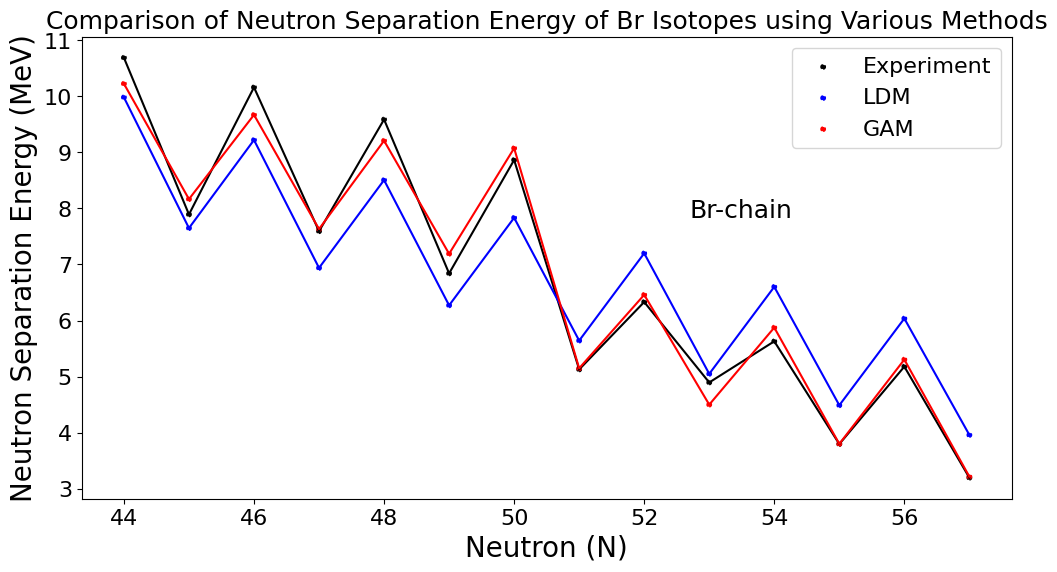

In [21]:
## Plot of Neutron Separation Energy using Various Methods for Br-Chain

sn_real = []
sn_LDM = []
sn_gam = []
# sn_gami = []
A_N = []

# Used Z,Na,Nb: 20,22,34 \ 35 44 57 \82,114,133 \50 76 85
Z = 35
Na = 44
Nb = 57
for neutron in range(Na, Nb + 1, 1):
    A = Z + neutron
    A_N.append(neutron)
    sn_LDM.append(LDM(A, Z) - LDM(A - 1, Z))
    sn_real.append(real(A, Z) - real(A - 1, Z))
    sn_gam.append(gam_pred(A, Z) - gam_pred(A - 1, Z))
    # sn_gami.append(gami_pred(A, Z) - gami_pred(A - 1, Z))

plt.figure(figsize=(12, 6))

# Real (Experimental)
plt.scatter(A_N, sn_real, c="black",
            # linewidths = 0.6,
            marker="o",
            # edgecolor="blue",
            s=10,
            linestyle="--",
            label='Experiment'
            )
plt.plot(A_N, sn_real, c="black")

# LDM
plt.scatter(A_N, sn_LDM, c="blue",
            # linewidths = 0.6,
            marker="o",
            # edgecolor="blue",
            s=10,
            linestyle="--",
            label='LDM'
            )
plt.plot(A_N, sn_LDM, c="blue")

# GAM
plt.scatter(A_N, sn_gam, c="red",
            # linewidths = 0.6,
            marker="o",
            # edgecolor="blue",
            s=10,
            linestyle="--",
            label='GAM'
            )
plt.plot(A_N, sn_gam, c="red")

plt.xticks(range(Na, Nb, 2))
plt.xlabel("Neutron (N)", fontsize=20)
plt.ylabel("Neutron Separation Energy (MeV)", fontsize=20)

# Increase font size for axis tick labels
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(loc='upper right', fontsize=16)
plt.title("Comparison of Neutron Separation Energy of Br Isotopes using Various Methods", fontsize=18)
plt.text(A_N[9] - 0.3, sn_LDM[6], "Br-chain", fontsize=18)
plt.show()


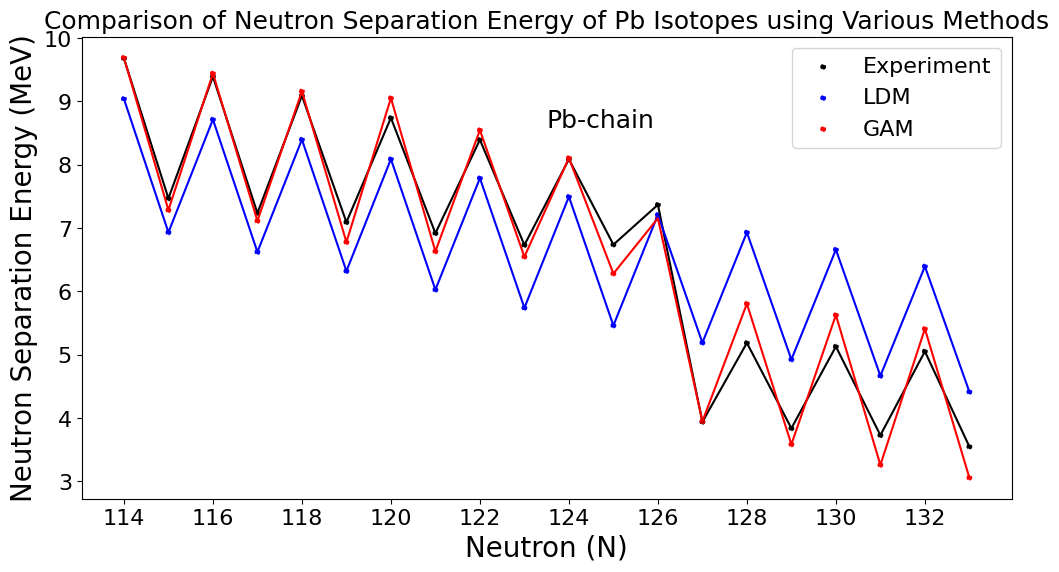

In [22]:
## Plot of Neutron Separation Energy using Various Methods for Pb-Chain

sn_real = []
sn_LDM = []
sn_gam = []
# sn_gami = []
A_N = []

# Used Z,Na,Nb: 20,22,34 \ 35 44 57 \82,114,133 \50 76 85
Z = 82
Na = 114
Nb = 133
for neutron in range(Na, Nb+1, 1):
    A = Z + neutron
    A_N.append(neutron)
    sn_LDM.append(LDM(A, Z) - LDM(A-1, Z))
    sn_real.append(real(A, Z) - real(A-1, Z))
    sn_gam.append(gam_pred(A, Z) - gam_pred(A-1, Z))
    # sn_gami.append(gami_pred(A, Z) - gami_pred(A-1, Z))
    
plt.figure(figsize=(12,6))

# Real (Experimental)
plt.scatter(A_N, sn_real, c="black",
            # linewidths=0.6,
            marker="o",
            # edgecolor="blue",
            s=10,
            linestyle="--",
            label='Experiment'
            )
plt.plot(A_N, sn_real, c="black")

# LDM
plt.scatter(A_N, sn_LDM, c="blue",
            # linewidths=0.6,
            marker="o",
            # edgecolor="blue",
            s=10,
            linestyle="--",
            label='LDM'
            )
plt.plot(A_N, sn_LDM, c="blue")

# GAM
plt.scatter(A_N, sn_gam, c="red",
            # linewidths=0.6,
            marker="o",
            # edgecolor="blue",
            s=10,
            linestyle="--",
            label='GAM'
            )
plt.plot(A_N, sn_gam, c="red")

plt.xticks(range(Na, Nb, 2))
plt.xlabel("Neutron (N)", fontsize=20)
plt.ylabel("Neutron Separation Energy (MeV)", fontsize=20)

# Increase font size for axis tick labels
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(loc='upper right', fontsize=16)
plt.title("Comparison of Neutron Separation Energy of Pb Isotopes using Various Methods", fontsize=18)
plt.text(A_N[9]+0.5, sn_LDM[6]+0.5, "Pb-chain", fontsize=18)
plt.show()


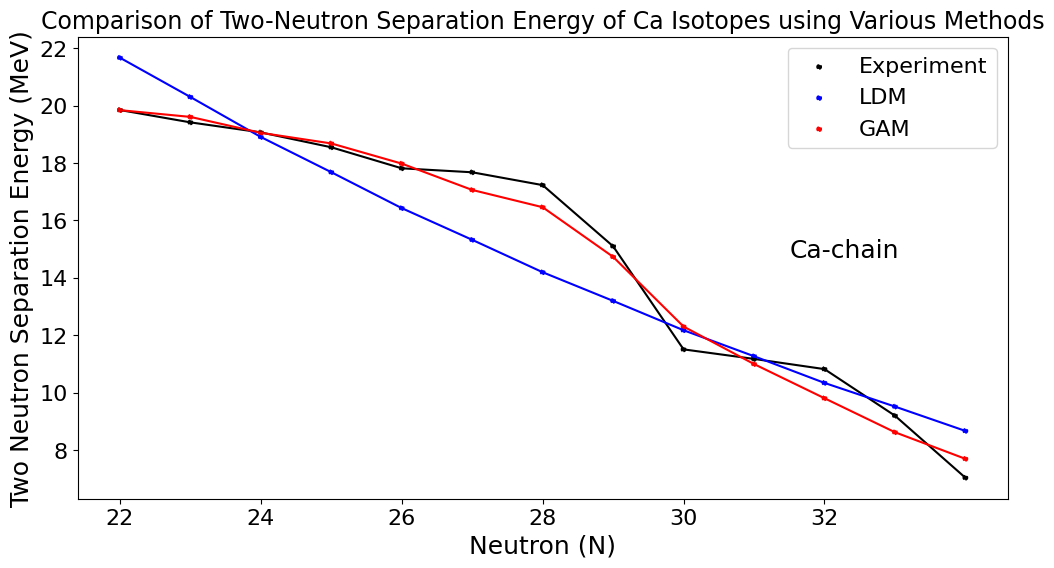

In [23]:
## Plot of Two-Neutron Separation Energy using Various Methods for Ca-Chain

sn_real = []
sn_LDM = []
sn_gam = []
# sn_gami = []
A_N = []

# Used Z,Na,Nb: 20,22,34 \ 35 44 57 \82,114,133 \50 76 85
Z = 20
Na = 22
Nb = 34
for neutron in range(Na, Nb+1, 1):
    A = Z + neutron
    A_N.append(neutron)
    sn_LDM.append(LDM(A, Z) - LDM(A-2, Z))
    sn_real.append(real(A, Z) - real(A-2, Z))
    sn_gam.append(gam_pred(A, Z) - gam_pred(A-2, Z))
    # sn_gami.append(gami_pred(A, Z) - gami_pred(A-2, Z))

plt.figure(figsize=(12,6))

# Real (Experimental)
plt.scatter(A_N, sn_real, c="black",
            # linewidths=0.6,
            marker="o",
            # edgecolor="blue",
            s=10,
            linestyle="--",
            label='Experiment'
            )
plt.plot(A_N, sn_real, c="black")

# LDM
plt.scatter(A_N, sn_LDM, c="blue",
            # linewidths=0.6,
            marker="o",
            # edgecolor="blue",
            s=10,
            linestyle="--",
            label='LDM'
            )
plt.plot(A_N, sn_LDM, c="blue")

# GAM
plt.scatter(A_N, sn_gam, c="red",
            # linewidths=0.6,
            marker="o",
            # edgecolor="blue",
            s=10,
            linestyle="--",
            label='GAM'
            )
plt.plot(A_N, sn_gam, c="red")

plt.xticks(range(Na, Nb, 2))
plt.xlabel("Neutron (N)", fontsize=18)
plt.ylabel("Two Neutron Separation Energy (MeV)", fontsize=18)

# Increase font size for axis tick labels
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(loc='upper right', fontsize=16)
plt.title("Comparison of Two-Neutron Separation Energy of Ca Isotopes using Various Methods", fontsize=17)
plt.text(A_N[9] + 0.5, sn_LDM[6] + 0.5, "Ca-chain", fontsize=18)

plt.show()


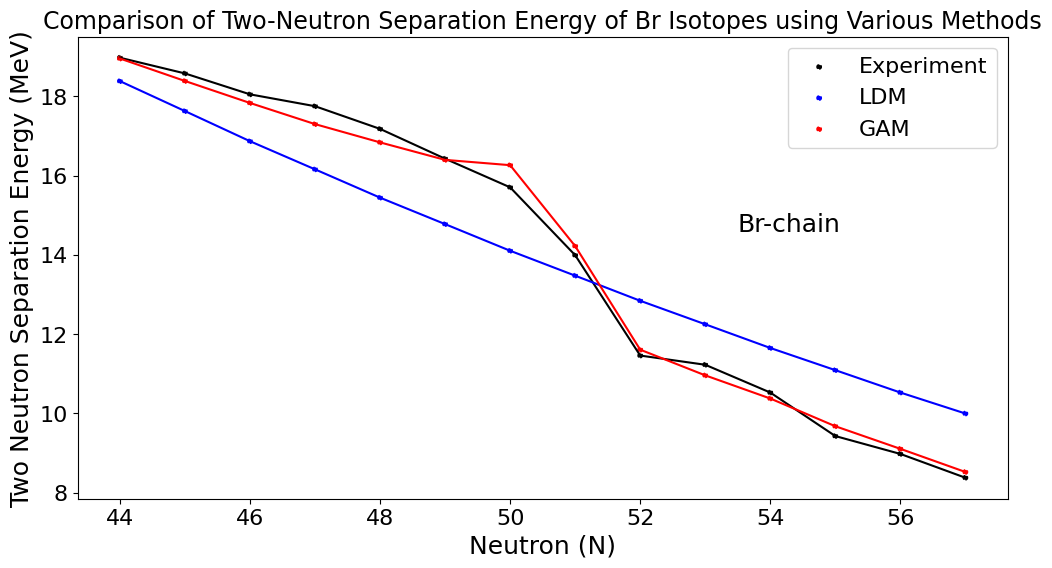

In [24]:
## Plot of Two-Neutron Separation Energy for Various Br-Chain Methods

sn_real = []
sn_LDM = []
sn_gam = []
# sn_gami = []
A_N = []

# Using Z, Na, Nb: 35, 44, 57
Z = 35
Na = 44
Nb = 57
for neutron in range(Na, Nb + 1, 1):
    A = Z + neutron
    A_N.append(neutron)
    sn_LDM.append(LDM(A, Z) - LDM(A - 2, Z))
    sn_real.append(real(A, Z) - real(A - 2, Z))
    sn_gam.append(gam_pred(A, Z) - gam_pred(A - 2, Z))
    # sn_gami.append(gami_pred(A, Z) - gami_pred(A - 2, Z))

plt.figure(figsize=(12, 6))

# Real (Experiment)
plt.scatter(A_N, sn_real, c="black",
            marker="o",
            s=10,
            linestyle="--",
            label='Experiment'
            )
plt.plot(A_N, sn_real, c="black")

# LDM
plt.scatter(A_N, sn_LDM, c="blue",
            marker="o",
            s=10,
            linestyle="--",
            label='LDM'
            )
plt.plot(A_N, sn_LDM, c="blue")

# GAM
plt.scatter(A_N, sn_gam, c="red",
            marker="o",
            s=10,
            linestyle="--",
            label='GAM'
            )
plt.plot(A_N, sn_gam, c="red")

plt.xticks(range(Na, Nb, 2))
plt.xlabel("Neutron (N)", fontsize=18)
plt.ylabel("Two Neutron Separation Energy (MeV)", fontsize=18)

# Increase font size for axis tick labels
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(loc='upper right', fontsize=16)
plt.title("Comparison of Two-Neutron Separation Energy of Br Isotopes using Various Methods", fontsize=17)
plt.text(A_N[9] + 0.5, sn_LDM[6] + 0.5, "Br-chain", fontsize=18)

plt.show()


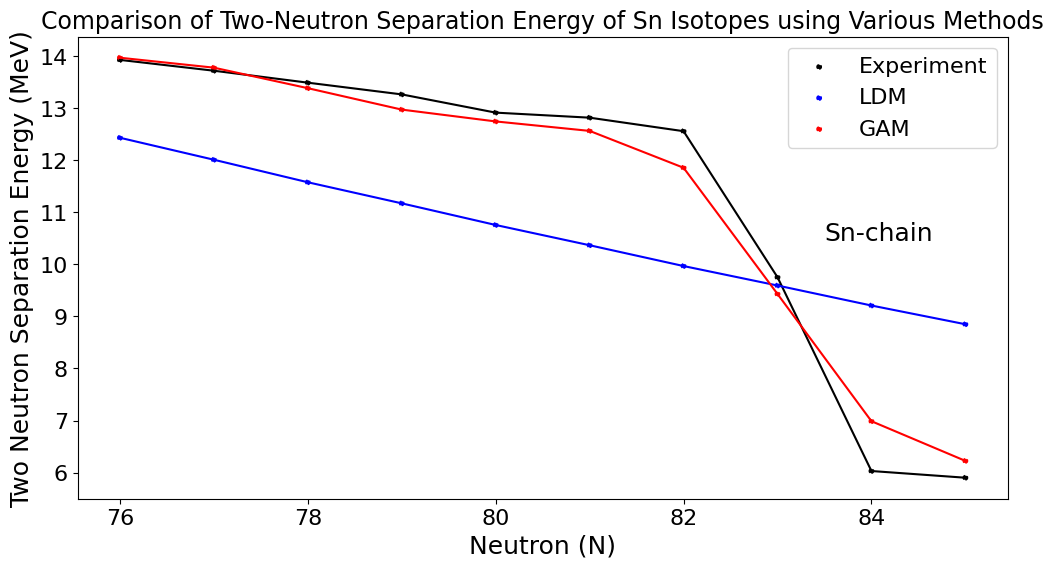

In [25]:
## Plot of Two-Neutron Separation Energy for Various Sn-Chain Methods

sn_real = []
sn_LDM = []
sn_gam = []
# sn_gami = []
A_N = []

# Using Z, Na, Nb: 50, 76, 85
Z = 50
Na = 76
Nb = 85
for neutron in range(Na, Nb + 1, 1):
    A = Z + neutron
    A_N.append(neutron)
    sn_LDM.append(LDM(A, Z) - LDM(A - 2, Z))
    sn_real.append(real(A, Z) - real(A - 2, Z))
    sn_gam.append(gam_pred(A, Z) - gam_pred(A - 2, Z))
    # sn_gami.append(gami_pred(A, Z) - gami_pred(A - 2, Z))

plt.figure(figsize=(12, 6))

# Real (Experiment)
plt.scatter(A_N, sn_real, c="black",
            marker="o",
            s=10,
            linestyle="--",
            label='Experiment'
            )
plt.plot(A_N, sn_real, c="black")

# LDM
plt.scatter(A_N, sn_LDM, c="blue",
            marker="o",
            s=10,
            linestyle="--",
            label='LDM'
            )
plt.plot(A_N, sn_LDM, c="blue")

# GAM
plt.scatter(A_N, sn_gam, c="red",
            marker="o",
            s=10,
            linestyle="--",
            label='GAM'
            )
plt.plot(A_N, sn_gam, c="red")

plt.xticks(range(Na, Nb, 2))
plt.xlabel("Neutron (N)", fontsize=18)
plt.ylabel("Two Neutron Separation Energy (MeV)", fontsize=18)

# Increase font size for axis tick labels
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(loc='upper right', fontsize=16)
plt.title("Comparison of Two-Neutron Separation Energy of Sn Isotopes using Various Methods", fontsize=17)
plt.text(A_N[7] + 0.5, sn_LDM[6] + 0.5, "Sn-chain", fontsize=18)

plt.show()


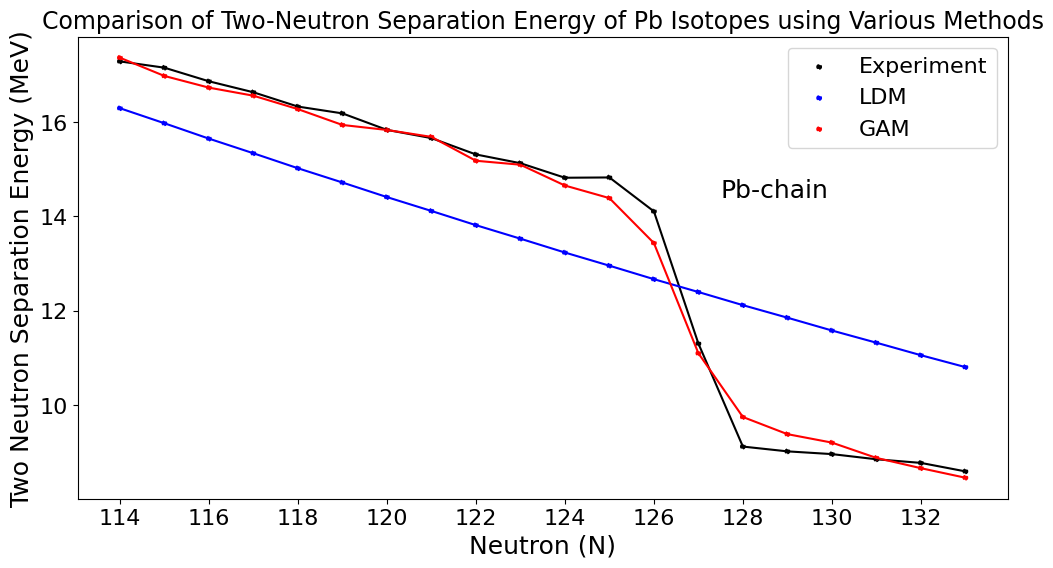

In [26]:
## Plot of Two-Neutron Separation Energy for Various Pb-Chain Methods

sn_real = []
sn_LDM = []
sn_gam = []
# sn_gami = []
A_N = []

# Using Z, Na, Nb: 82, 114, 133
Z = 82
Na = 114
Nb = 133
for neutron in range(Na, Nb + 1, 1):
    A = Z + neutron
    A_N.append(neutron)
    sn_LDM.append(LDM(A, Z) - LDM(A - 2, Z))
    sn_real.append(real(A, Z) - real(A - 2, Z))
    sn_gam.append(gam_pred(A, Z) - gam_pred(A - 2, Z))
    # sn_gami.append(gami_pred(A, Z) - gami_pred(A - 2, Z))

plt.figure(figsize=(12, 6))

# Real (Experiment)
plt.scatter(A_N, sn_real, c="black",
            marker="o",
            s=10,
            linestyle="--",
            label='Experiment'
            )
plt.plot(A_N, sn_real, c="black")

# LDM
plt.scatter(A_N, sn_LDM, c="blue",
            marker="o",
            s=10,
            linestyle="--",
            label='LDM'
            )
plt.plot(A_N, sn_LDM, c="blue")

# GAM
plt.scatter(A_N, sn_gam, c="red",
            marker="o",
            s=10,
            linestyle="--",
            label='GAM'
            )
plt.plot(A_N, sn_gam, c="red")

plt.xticks(range(Na, Nb, 2))
plt.xlabel("Neutron (N)", fontsize=18)
plt.ylabel("Two Neutron Separation Energy (MeV)", fontsize=18)

# Increase font size for axis tick labels
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(loc='upper right', fontsize=16)
plt.title("Comparison of Two-Neutron Separation Energy of Pb Isotopes using Various Methods", fontsize=17)
plt.text(A_N[13] + 0.5, sn_LDM[6], "Pb-chain", fontsize=18)

plt.show()
